# Find and Remove Outliers in Credit Card Fraud Detection Dataset


**Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not**

**Information about data set**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# sampling random 50000 points
data_50000 = data.sample(n = 50000)

In [6]:
data_50000.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
127306,78286.0,-1.570460,-0.051664,1.884651,-0.939705,-0.679193,0.141161,-0.543165,1.018808,0.611479,...,-0.042499,-0.286909,0.049376,0.019796,-0.224265,0.814524,0.132949,0.005025,48.95,0
61919,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,0.109534,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
153747,99968.0,-0.551407,1.625713,0.348719,-0.907557,1.845395,-0.483717,2.342642,-1.807167,3.210068,...,-0.312354,1.274172,-0.304756,0.597497,-0.616562,-0.457962,-0.018697,-0.879917,1.29,0
157216,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,1.475046,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
44783,42082.0,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,0.005527,...,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.99,0


In [7]:
data_50000.to_csv("NewCreditCard.csv")

### Detecting outliers for 'k' value 2

#### We have assumed that 50% of total points in our data set are outliers.

In [8]:
newData = pd.read_csv("NewCreditCard.csv")

In [9]:
newData.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,127306,78286.0,-1.570460,-0.051664,1.884651,-0.939705,-0.679193,0.141161,-0.543165,1.018808,...,-0.042499,-0.286909,0.049376,0.019796,-0.224265,0.814524,0.132949,0.005025,48.95,0
1,61919,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
2,153747,99968.0,-0.551407,1.625713,0.348719,-0.907557,1.845395,-0.483717,2.342642,-1.807167,...,-0.312354,1.274172,-0.304756,0.597497,-0.616562,-0.457962,-0.018697,-0.879917,1.29,0
3,157216,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
4,44783,42082.0,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,...,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.99,0


In [10]:
FinalData = newData.drop("Unnamed: 0", axis = 1)

In [11]:
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,78286.0,-1.570460,-0.051664,1.884651,-0.939705,-0.679193,0.141161,-0.543165,1.018808,0.611479,...,-0.042499,-0.286909,0.049376,0.019796,-0.224265,0.814524,0.132949,0.005025,48.95,0
1,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,0.109534,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
2,99968.0,-0.551407,1.625713,0.348719,-0.907557,1.845395,-0.483717,2.342642,-1.807167,3.210068,...,-0.312354,1.274172,-0.304756,0.597497,-0.616562,-0.457962,-0.018697,-0.879917,1.29,0
3,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,1.475046,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
4,42082.0,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,0.005527,...,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.99,0


In [12]:
FinalData.shape

(50000, 31)

In [13]:
lof = LocalOutlierFactor(n_neighbors=2, algorithm='auto', metric='minkowski', p=2, metric_params=None, contamination=0.5, n_jobs=1)

outlierArray = lof.fit_predict(FinalData)

outlierArray

array([-1,  1, -1, ...,  1,  1, -1])

**Here, we got an array, where row corresponding to array element 1 in our dataset is an inlier and row corresponding to array element to -1 in our dataset is an oulier**

In [14]:
len(outlierArray)

50000

**Calculating total number of outlier and inliers**

In [15]:
countOutliers = 0
countInliers = 0
for i in range(50000):
    if outlierArray[i] == -1:
        countOutliers += 1
    else:
        countInliers += 1
print("Total number of outliers = "+str(countOutliers))
print("Total number of inliers = "+str(countInliers))

Total number of outliers = 25000
Total number of inliers = 25000


In [16]:
FinalData2 = FinalData.copy()

In [17]:
FinalData2.shape

(50000, 31)

**Removing Outliers**

In [18]:
for i in range(50000):
    if outlierArray[i] == -1:
        FinalData.drop(i, inplace = True)
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,0.109534,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
3,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,1.475046,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
4,42082.0,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,0.005527,...,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.99,0
5,42644.0,1.257629,0.625968,-0.675252,0.676858,0.363998,-0.936655,0.327688,-0.172623,-0.464456,...,-0.119216,-0.301195,-0.141110,-0.097770,0.597812,0.370451,-0.032338,0.030225,0.76,0
6,122525.0,1.981493,-0.252533,-1.863740,0.556561,0.299170,-0.936271,0.448755,-0.295349,0.555655,...,-0.018446,-0.075680,0.064867,0.746939,0.173595,0.345001,-0.108254,-0.060371,62.98,0


In [19]:
FinalData2.shape

(50000, 31)

In [20]:
FinalData.shape

(25000, 31)

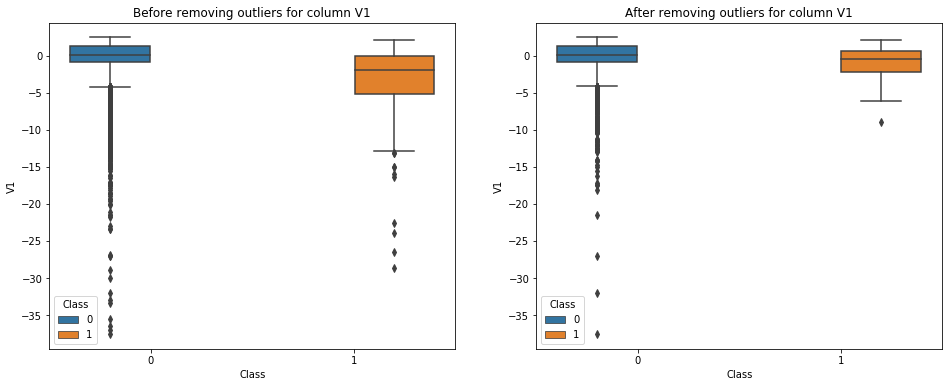

In [21]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData, hue = "Class")

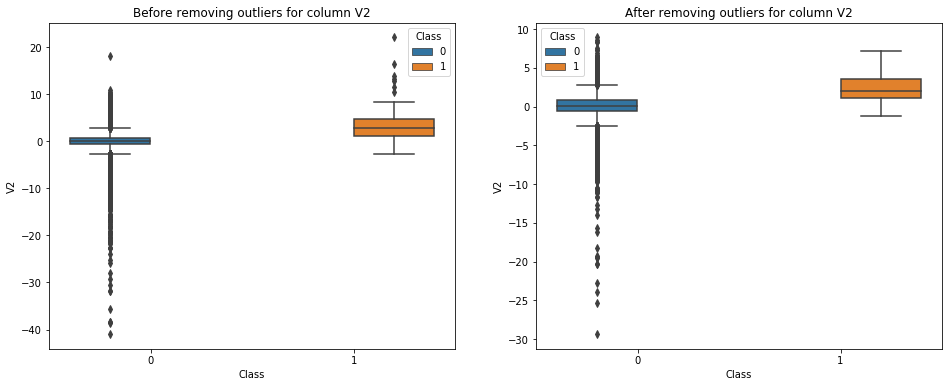

In [22]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData, hue = "Class")

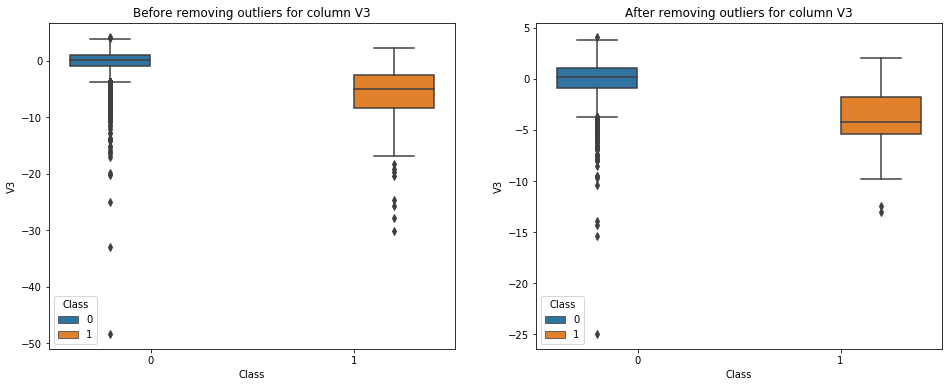

In [23]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData, hue = "Class")

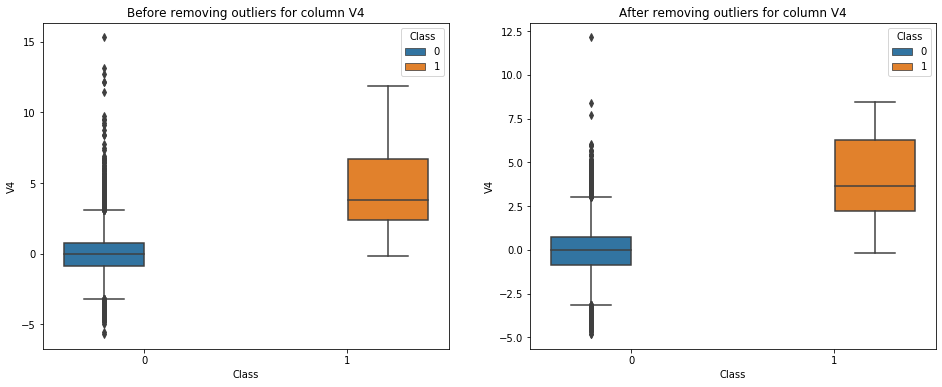

In [24]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData, hue = "Class")

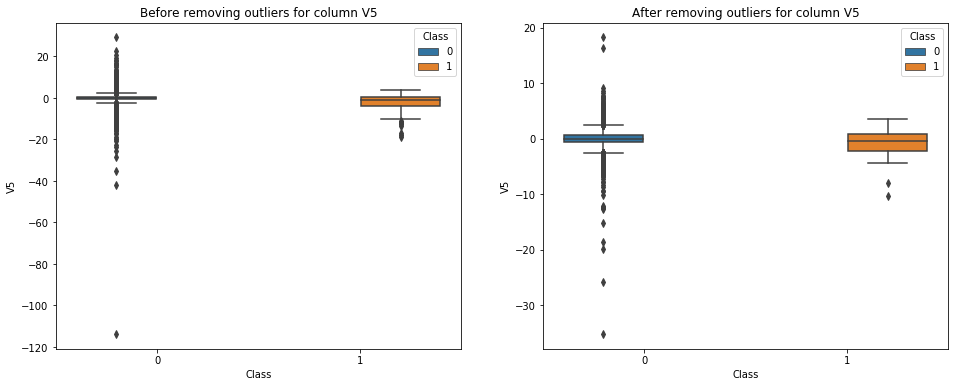

In [25]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData, hue = "Class")

**It can easily be observed in all of the above boxplots corresponding to columns V1, V2, V3, V4, V5, that most of the outliers for points belongs to class 1 has been removed. Furthermore, many of the outliers for points belong to class 0 has also been removed. For example for class 0 in plot 1 for column V1 all of the outliers less than -35 have been removed. Similarly, for class 0 in plot 3 for column V3 all the outliers less than -18 have been removed. Similarly, for class 0 in plot 5 for column V5 all of the outliers greater than 15 have been removed.**

### Detecting outliers for 'k' value 3

#### We have assumed that 50% of total points in our data set are outliers.

In [26]:
newData = pd.read_csv("NewCreditCard.csv")

newData.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,127306,78286.0,-1.570460,-0.051664,1.884651,-0.939705,-0.679193,0.141161,-0.543165,1.018808,...,-0.042499,-0.286909,0.049376,0.019796,-0.224265,0.814524,0.132949,0.005025,48.95,0
1,61919,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
2,153747,99968.0,-0.551407,1.625713,0.348719,-0.907557,1.845395,-0.483717,2.342642,-1.807167,...,-0.312354,1.274172,-0.304756,0.597497,-0.616562,-0.457962,-0.018697,-0.879917,1.29,0
3,157216,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
4,44783,42082.0,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,...,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.99,0


In [27]:
FinalData = newData.drop("Unnamed: 0", axis = 1)

FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,78286.0,-1.570460,-0.051664,1.884651,-0.939705,-0.679193,0.141161,-0.543165,1.018808,0.611479,...,-0.042499,-0.286909,0.049376,0.019796,-0.224265,0.814524,0.132949,0.005025,48.95,0
1,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,0.109534,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
2,99968.0,-0.551407,1.625713,0.348719,-0.907557,1.845395,-0.483717,2.342642,-1.807167,3.210068,...,-0.312354,1.274172,-0.304756,0.597497,-0.616562,-0.457962,-0.018697,-0.879917,1.29,0
3,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,1.475046,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
4,42082.0,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,0.005527,...,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.99,0


In [28]:
FinalData.shape

(50000, 31)

In [29]:
lof = LocalOutlierFactor(n_neighbors=3, algorithm='auto', metric='minkowski', p=2, metric_params=None, contamination=0.5, n_jobs=1)

outlierArray = lof.fit_predict(FinalData)

outlierArray

array([-1,  1, -1, ..., -1,  1,  1])

**Here, we got an array, where row corresponding to array element 1 in our dataset is an inlier and row corresponding to array element to -1 in our dataset is an oulier**

In [30]:
len(outlierArray)

50000

**Calculating total number of outlier and inliers**

In [31]:
countOutliers = 0
countInliers = 0
for i in range(50000):
    if outlierArray[i] == -1:
        countOutliers += 1
    else:
        countInliers += 1
print("Total number of outliers = "+str(countOutliers))
print("Total number of inliers = "+str(countInliers))

Total number of outliers = 25000
Total number of inliers = 25000


In [32]:
FinalData2 = FinalData.copy()

In [33]:
FinalData2.shape

(50000, 31)

**Removing Outliers**

In [34]:
for i in range(50000):
    if outlierArray[i] == -1:
        FinalData.drop(i, inplace = True)
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,0.109534,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
3,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,1.475046,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
5,42644.0,1.257629,0.625968,-0.675252,0.676858,0.363998,-0.936655,0.327688,-0.172623,-0.464456,...,-0.119216,-0.301195,-0.141110,-0.097770,0.597812,0.370451,-0.032338,0.030225,0.76,0
6,122525.0,1.981493,-0.252533,-1.863740,0.556561,0.299170,-0.936271,0.448755,-0.295349,0.555655,...,-0.018446,-0.075680,0.064867,0.746939,0.173595,0.345001,-0.108254,-0.060371,62.98,0
9,35483.0,-0.509905,-2.629370,0.388648,1.757071,-1.068684,1.824353,0.118010,0.443424,0.656967,...,0.726568,0.692037,-0.593968,-0.580804,-0.126838,-0.230708,-0.002900,0.156778,766.88,0


In [35]:
FinalData2.shape

(50000, 31)

In [36]:
FinalData.shape

(25000, 31)

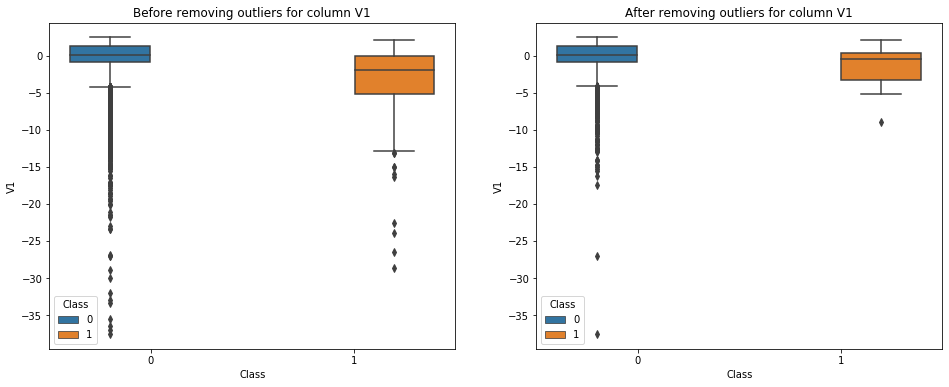

In [37]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData, hue = "Class")

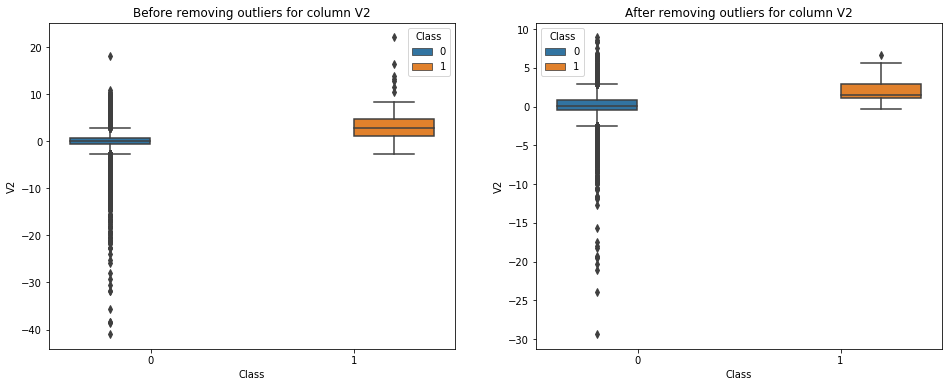

In [38]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData, hue = "Class")

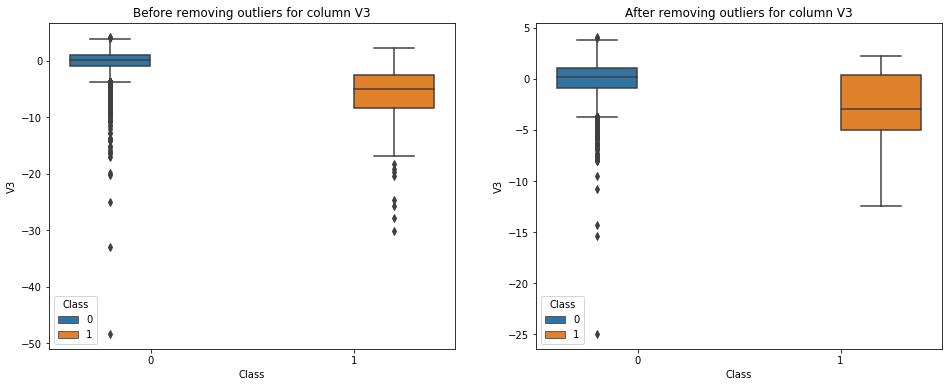

In [39]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData, hue = "Class")

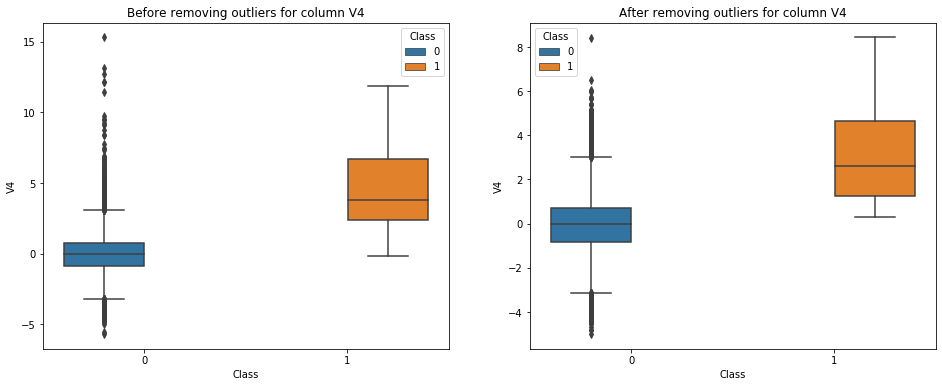

In [40]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData, hue = "Class")

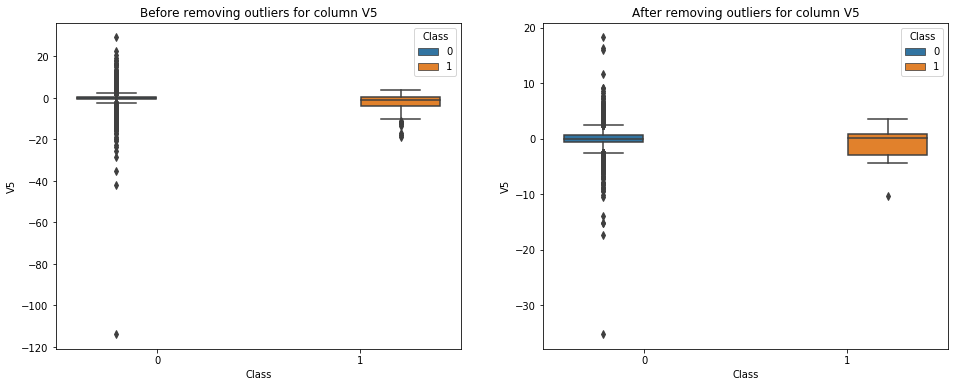

In [41]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData, hue = "Class")

**It can easily be observed in all of the above boxplots corresponding to columns V1, V2, V3, V4, V5, that most of the outliers for points belongs to class 1 has been removed. Furthermore, many of the outliers for points belong to class 0 has also been removed. For example for class 0 in plot 1 for column V1 all of the outliers less than -35 have been removed. Similarly, for class 0 in plot 3 for column V3 all the outliers less than -18 have been removed. Similarly, for class 0 in plot 5 for column V5 all of the outliers greater than 15 have been removed.**

### Detecting outliers for 'k' value 5

#### We have assumed that 50% of total points in our data set are outliers.

In [42]:
newData = pd.read_csv("NewCreditCard.csv")

newData.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,127306,78286.0,-1.570460,-0.051664,1.884651,-0.939705,-0.679193,0.141161,-0.543165,1.018808,...,-0.042499,-0.286909,0.049376,0.019796,-0.224265,0.814524,0.132949,0.005025,48.95,0
1,61919,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
2,153747,99968.0,-0.551407,1.625713,0.348719,-0.907557,1.845395,-0.483717,2.342642,-1.807167,...,-0.312354,1.274172,-0.304756,0.597497,-0.616562,-0.457962,-0.018697,-0.879917,1.29,0
3,157216,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
4,44783,42082.0,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,...,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.99,0


In [43]:
FinalData = newData.drop("Unnamed: 0", axis = 1)

FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,78286.0,-1.570460,-0.051664,1.884651,-0.939705,-0.679193,0.141161,-0.543165,1.018808,0.611479,...,-0.042499,-0.286909,0.049376,0.019796,-0.224265,0.814524,0.132949,0.005025,48.95,0
1,50049.0,1.077313,0.069079,0.485032,1.345355,-0.263816,0.010919,-0.051173,0.148398,0.109534,...,-0.034452,0.035873,-0.055862,0.216017,0.578927,-0.341847,0.029478,0.009133,23.68,0
2,99968.0,-0.551407,1.625713,0.348719,-0.907557,1.845395,-0.483717,2.342642,-1.807167,3.210068,...,-0.312354,1.274172,-0.304756,0.597497,-0.616562,-0.457962,-0.018697,-0.879917,1.29,0
3,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,1.475046,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
4,42082.0,1.313872,0.328257,-0.291373,0.306360,0.568722,0.216932,0.031462,-0.020081,0.005527,...,-0.343473,-0.908457,-0.022990,-1.346924,0.357107,0.208395,-0.003123,0.014764,0.99,0


In [44]:
FinalData.shape

(50000, 31)

In [45]:
lof = LocalOutlierFactor(n_neighbors=5, algorithm='auto', metric='minkowski', p=2, metric_params=None, contamination=0.5, n_jobs=1)

outlierArray = lof.fit_predict(FinalData)

outlierArray

array([-1, -1, -1, ...,  1,  1, -1])

**Here, we got an array, where row corresponding to array element 1 in our dataset is an inlier and row corresponding to array element to -1 in our dataset is an oulier**

In [46]:
len(outlierArray)

50000

**Calculating total number of outlier and inliers**

In [47]:
countOutliers = 0
countInliers = 0
for i in range(50000):
    if outlierArray[i] == -1:
        countOutliers += 1
    else:
        countInliers += 1
print("Total number of outliers = "+str(countOutliers))
print("Total number of inliers = "+str(countInliers))

Total number of outliers = 25000
Total number of inliers = 25000


In [48]:
FinalData2 = FinalData.copy()

In [49]:
FinalData2.shape

(50000, 31)

**Removing Outliers**

In [50]:
for i in range(50000):
    if outlierArray[i] == -1:
        FinalData.drop(i, inplace = True)
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3,109715.0,-0.440997,0.818730,1.925260,-0.397963,0.762742,0.518384,0.525002,-0.162991,1.475046,...,-0.353624,-0.588766,-0.346350,-0.060142,0.404193,-0.719609,-0.085553,-0.144571,11.27,0
11,147939.0,-0.775763,0.113741,-0.478553,-1.308052,0.831466,-0.562981,1.727217,-0.123131,-0.035261,...,0.068166,-0.073262,0.405095,-0.599902,-0.487463,-0.418992,0.106639,0.248902,216.20,0
13,170199.0,-0.551225,0.813681,0.312986,-1.044273,1.091791,-0.682278,0.933475,0.112966,-0.375703,...,-0.245717,-0.898986,-0.070311,0.612770,-0.250728,0.052700,0.024815,0.141575,1.98,0
14,148382.0,-0.670461,1.213386,-0.262545,-0.589820,-0.137777,-1.204101,0.593904,0.259391,0.251943,...,-0.251169,-0.717064,0.156777,-0.001495,-0.472961,0.136874,0.095130,0.082630,17.99,0
15,1216.0,1.231345,-0.023375,-0.333902,0.893327,0.598923,1.089545,-0.172479,0.330924,0.393031,...,-0.178722,-0.395878,-0.274231,-1.746339,0.806781,-0.217701,0.022302,-0.014272,13.99,0


In [51]:
FinalData2.shape

(50000, 31)

In [52]:
FinalData.shape

(25000, 31)

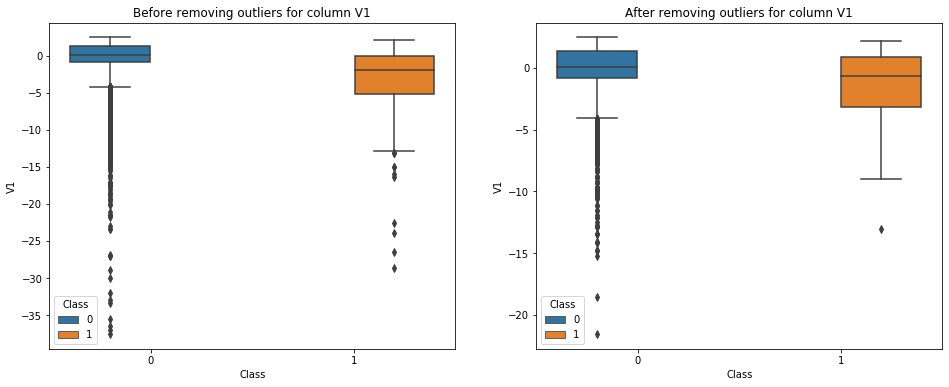

In [53]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData, hue = "Class")

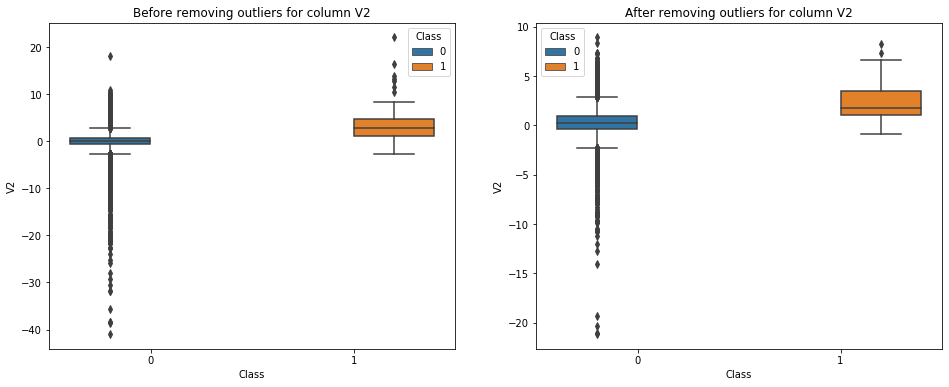

In [54]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData, hue = "Class")

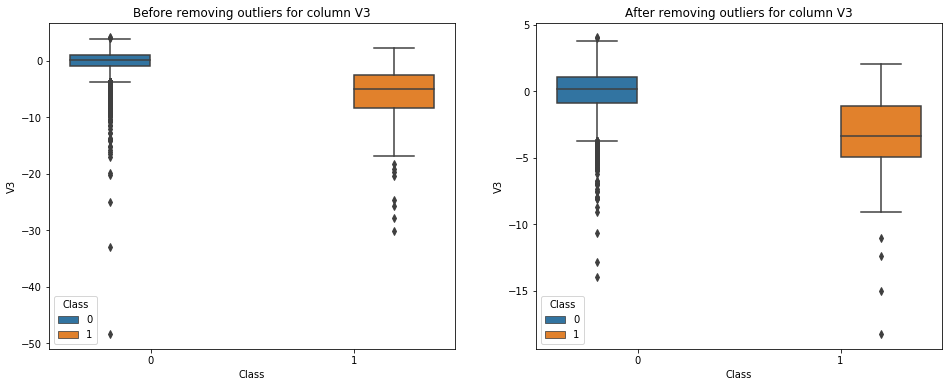

In [55]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData, hue = "Class")

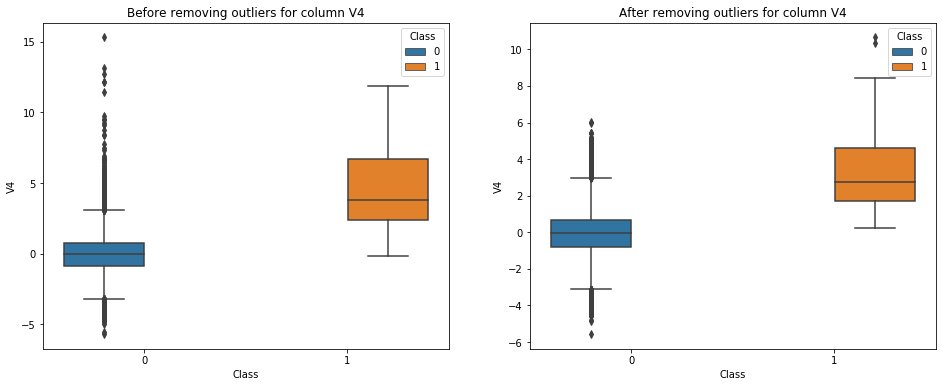

In [56]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData, hue = "Class")

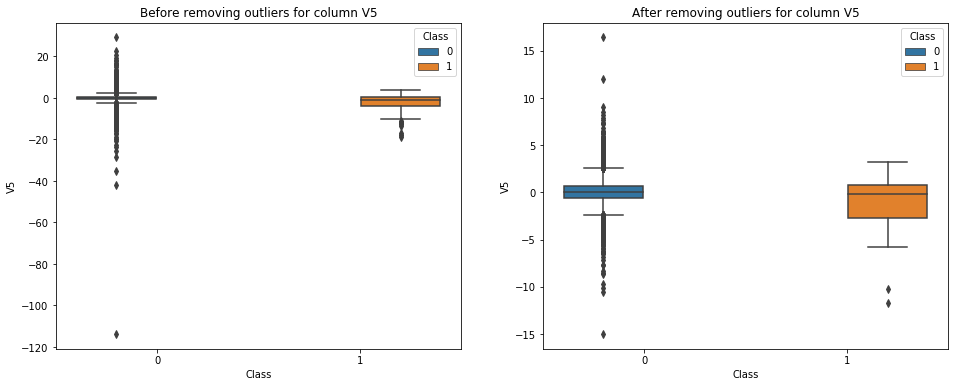

In [57]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData, hue = "Class")

**It can easily be observed in all of the above boxplots corresponding to columns V1, V2, V3, V4, V5, that most of the outliers for points belongs to class 1 has been removed. Furthermore, many of the outliers for points belong to class 0 has also been removed. For example for class 0 in plot 1 for column V1 all of the outliers less than -17 have been removed. Similarly, for class 0 in plot 3 for column V3 all the outliers less than -15 have been removed. Similarly, for class 0 in plot 5 for column V5 all of the outliers greater than 8.5 have been removed.**

**In conclusion, for k = 5 more outliers have been removed as compared to k = 2 or 3. Therefore, k = 5 is the best value for number of neighbors.**